In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Sec-5 (CSE)  unofficial.txt', 'r', encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

07/08/2021, 12:05 - Sidharth Tomar created group "Sec-5 (CSE)  unofficial 🤩"
07/08/2021, 12:05 - You were added
09/11/2021, 15:50 - +91 73517 15995: <Media omitted>
09/11/2021, 19:18 - +91 81714 33727: This message was deleted
10/11/2021, 16:36 - +91 83183 66090: HIRING ALERT IN THE BEST COMPANY FOR YOUTH.🚨

Want to learn and earn at the same time by just sitting at home amidst this pandemic? Doesn’t it Seem Interesting?💎

HOMEFLIC WEGROW brings to you the most amazing internship opportunity! ✨and chance to earn fixed stipend of Rs.5000 plus daily incentives of Rs.2000.

NOTE: 👇🏻
-We don’t want any money from you for this internship.
- We are not a network marketing company .

HOW TO APPLY❓

1. Fill the form below.
                         OR 
2. Join any one Whatsapp group 
and our HR Team will reach out to you!

https://forms.gle/2EjgjPYuj8CN3bse9

Join any one of the group using the link

Group 1
https://chat.whatsapp.com/H095iCEp54H4KqpA9ZjLzW

Group 2
https://chat.whatsapp.com/Ctw

In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages = re.split(pattern, data)[1:]
messages

['Sidharth Tomar created group "Sec-5 (CSE)  unofficial 🤩"\n',
 'You were added\n',
 '+91 73517 15995: <Media omitted>\n',
 '+91 81714 33727: This message was deleted\n',
 '+91 83183 66090: HIRING ALERT IN THE BEST COMPANY FOR YOUTH.🚨\n\nWant to learn and earn at the same time by just sitting at home amidst this pandemic? Doesn’t it Seem Interesting?💎\n\nHOMEFLIC WEGROW brings to you the most amazing internship opportunity! ✨and chance to earn fixed stipend of Rs.5000 plus daily incentives of Rs.2000.\n\nNOTE: 👇🏻\n-We don’t want any money from you for this internship.\n- We are not a network marketing company .\n\nHOW TO APPLY❓\n\n1. Fill the form below.\n                         OR \n2. Join any one Whatsapp group \nand our HR Team will reach out to you!\n\nhttps://forms.gle/2EjgjPYuj8CN3bse9\n\nJoin any one of the group using the link\n\nGroup 1\nhttps://chat.whatsapp.com/H095iCEp54H4KqpA9ZjLzW\n\nGroup 2\nhttps://chat.whatsapp.com/CtwTStcDqm6IVCW57cHjeK\n\nGroup 3\nhttps://chat.what

In [8]:
dates = re.findall(pattern, data)
dates

['07/08/2021, 12:05 - ',
 '07/08/2021, 12:05 - ',
 '09/11/2021, 15:50 - ',
 '09/11/2021, 19:18 - ',
 '10/11/2021, 16:36 - ',
 '10/11/2021, 23:00 - ',
 '10/11/2021, 23:00 - ',
 '10/11/2021, 23:00 - ',
 '10/11/2021, 23:02 - ',
 '10/11/2021, 23:02 - ',
 '11/11/2021, 00:14 - ',
 '11/11/2021, 00:15 - ',
 '11/11/2021, 00:15 - ',
 '11/11/2021, 00:15 - ',
 '11/11/2021, 00:15 - ',
 '11/11/2021, 07:20 - ',
 '11/11/2021, 07:21 - ',
 '11/11/2021, 07:24 - ',
 '11/11/2021, 07:25 - ',
 '11/11/2021, 07:53 - ',
 '11/11/2021, 08:40 - ',
 '11/11/2021, 11:18 - ',
 '11/11/2021, 12:12 - ',
 '11/11/2021, 12:12 - ',
 '11/11/2021, 12:16 - ',
 '11/11/2021, 12:16 - ',
 '11/11/2021, 12:20 - ',
 '11/11/2021, 13:43 - ',
 '11/11/2021, 13:57 - ',
 '11/11/2021, 14:01 - ',
 '11/11/2021, 15:00 - ',
 '11/11/2021, 15:30 - ',
 '11/11/2021, 15:42 - ',
 '11/11/2021, 15:46 - ',
 '11/11/2021, 15:51 - ',
 '11/11/2021, 15:51 - ',
 '11/11/2021, 15:53 - ',
 '11/11/2021, 15:53 - ',
 '11/11/2021, 15:53 - ',
 '11/11/2021, 15:54 - ',


# Convert message_data type

In [9]:
df = pd.DataFrame({'user_message':messages, 'message_date': dates})    
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')
df.rename(columns={'message_date': 'date'}, inplace=True)

In [10]:
df.head()

,user_message,date
0,"Sidharth Tomar created group ""Sec-5 (CSE) uno...",2021-08-07 12:05:00
1,You were added\n,2021-08-07 12:05:00
2,+91 73517 15995: <Media omitted>\n,2021-11-09 15:50:00
3,+91 81714 33727: This message was deleted\n,2021-11-09 19:18:00
4,+91 83183 66090: HIRING ALERT IN THE BEST COMP...,2021-11-10 16:36:00


In [11]:
df.shape

(3051, 2)

In [12]:
# Separate user name and message
users=[]
messages=[]

for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2021-08-07 12:05:00,group_notification,"Sidharth Tomar created group ""Sec-5 (CSE) uno..."
1,2021-08-07 12:05:00,group_notification,You were added\n
2,2021-11-09 15:50:00,+91 73517 15995,<Media omitted>\n
3,2021-11-09 19:18:00,+91 81714 33727,This message was deleted\n
4,2021-11-10 16:36:00,+91 83183 66090,


In [13]:
df['year'] = df['date'].dt.year

In [14]:
df.head()

,date,user,message,year
0,2021-08-07 12:05:00,group_notification,"Sidharth Tomar created group ""Sec-5 (CSE) uno...",2021
1,2021-08-07 12:05:00,group_notification,You were added\n,2021
2,2021-11-09 15:50:00,+91 73517 15995,<Media omitted>\n,2021
3,2021-11-09 19:18:00,+91 81714 33727,This message was deleted\n,2021
4,2021-11-10 16:36:00,+91 83183 66090,,2021


In [15]:
df['month'] = df['date'].dt.month_name()

In [16]:
df['day'] = df['date'].dt.day

In [17]:
df['hour'] = df['date'].dt.hour

In [18]:
df['minute'] = df['date'].dt.minute

In [19]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-08-07 12:05:00,group_notification,"Sidharth Tomar created group ""Sec-5 (CSE) uno...",2021,August,7,12,5
1,2021-08-07 12:05:00,group_notification,You were added\n,2021,August,7,12,5
2,2021-11-09 15:50:00,+91 73517 15995,<Media omitted>\n,2021,November,9,15,50
3,2021-11-09 19:18:00,+91 81714 33727,This message was deleted\n,2021,November,9,19,18
4,2021-11-10 16:36:00,+91 83183 66090,,2021,November,10,16,36


In [20]:
df[df['user'] == 'Deepali']

,date,user,message,year,month,day,hour,minute
36,2021-11-11 15:53:00,Deepali,No🥲\n,2021,November,11,15,53
37,2021-11-11 15:53:00,Deepali,He rang me up\n,2021,November,11,15,53
38,2021-11-11 15:53:00,Deepali,Wtf🥲\n,2021,November,11,15,53
71,2021-11-12 08:46:00,Deepali,Bodyguards or what? 😶\n,2021,November,12,8,46
87,2021-11-12 17:37:00,Deepali,Few students filled the form but left with dri...,2021,November,12,17,37
...,...,...,...,...,...,...,...,...
2918,2022-01-06 13:27:00,Deepali,😳\n,2022,January,6,13,27
2926,2022-01-06 13:30:00,Deepali,Or phir kick b krte😳✋🏻\n,2022,January,6,13,30
2935,2022-01-06 17:34:00,Deepali,Class h bhay klse to\n,2022,January,6,17,34
2936,2022-01-06 17:35:00,Deepali,Aaoge hi\n,2022,January,6,17,35


In [21]:
df[df['user'] == 'Deepali'].shape

(451, 8)

In [22]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [23]:
len(words)

15537

In [24]:
df[df['message'] == '<Media omitted>\n']

,date,user,message,year,month,day,hour,minute
2,2021-11-09 15:50:00,+91 73517 15995,<Media omitted>\n,2021,November,9,15,50
14,2021-11-11 00:15:00,+91 81714 33727,<Media omitted>\n,2021,November,11,0,15
22,2021-11-11 12:12:00,+91 70172 96725,<Media omitted>\n,2021,November,11,12,12
31,2021-11-11 15:30:00,+91 75638 00245,<Media omitted>\n,2021,November,11,15,30
52,2021-11-11 21:08:00,+91 80903 57107,<Media omitted>\n,2021,November,11,21,8
...,...,...,...,...,...,...,...,...
3017,2022-04-04 12:25:00,+91 96616 35454,<Media omitted>\n,2022,April,4,12,25
3020,2022-04-04 13:55:00,+91 8340 280 521,<Media omitted>\n,2022,April,4,13,55
3023,2022-04-08 09:16:00,+91 91173 29951,<Media omitted>\n,2022,April,8,9,16
3028,2022-04-09 14:04:00,+91 80903 57107,<Media omitted>\n,2022,April,9,14,4


In [25]:
print(df)

                    date                user  \
0    2021-08-07 12:05:00  group_notification   
1    2021-08-07 12:05:00  group_notification   
2    2021-11-09 15:50:00     +91 73517 15995   
3    2021-11-09 19:18:00     +91 81714 33727   
4    2021-11-10 16:36:00     +91 83183 66090   
...                  ...                 ...   
3046 2022-06-10 20:34:00    +91 6299 676 680   
3047 2022-06-11 16:18:00     +91 80760 95378   
3048 2022-06-19 22:09:00     +91 87002 80795   
3049 2022-06-22 18:53:00     +91 80760 95378   
3050 2022-06-23 23:17:00     +91 80903 57107   

                                                message  year     month  day  \
0     Sidharth Tomar created group "Sec-5 (CSE)  uno...  2021    August    7   
1                                      You were added\n  2021    August    7   
2                                     <Media omitted>\n  2021  November    9   
3                            This message was deleted\n  2021  November    9   
4                      

In [26]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's have URL stackoverflow.com as an google.com, https://facebook.goom, www.google.com")
urls

['stackoverflow.com', 'google.com', 'www.google.com']

In [27]:
links = []

for message in df['message']:
    #print(extractor.find_urls(message))
    links.extend(extractor.find_urls(message))

In [28]:
links

['https://docs.google.com/forms/d/1Y4wyeCkrCFbrR3YkQX3tu2jBfuXIMks58bFlL5vdch4/viewform?edit_requested=true',
 'https://docs.google.com/forms/d/1Y4wyeCkrCFbrR3YkQX3tu2jBfuXIMks58bFlL5vdch4/edit',
 'https://www.freeprojectz.com/projects/salary-management-system-synopsis',
 'window.in',
 'https://drive.google.com/folderview?id=1o0tbvMQ-K_lfWBsXLJ9JpUC9BHr7uidI',
 'https://docs.google.com/spreadsheets/d/1AXsJ3LM8K0o0eDO0S4kqbSZ1EZKnY1kVHi-x-YLVXuk/edit?usp=drivesdk',
 'https://youtu.be/6_6N_NYecYc',
 'https://www.instagram.com/galgotiasstudentcouncil/p/CXLcnPuPOVz/?utm_medium=share_sheet',
 'https://www.timesnownews.com/live-tv',
 'https://strawpoll.com/j8vae2u49',
 'https://www.javatpoint.com/method-overriding-in-java',
 'https://www.javatpoint.com/program-to-calculate-the-addition-of-two-matrice',
 'https://youtu.be/5yOQ5jWwIBk',
 'https://youtu.be/2QYpIvj3_po',
 'https://chat.whatsapp.com/BxUm1tXNsI25gLzBUQfuQ7',
 'https://youtu.be/o4wXg0275qA',
 'https://forms.gle/wPF4NNtjUVE5tMKj7',


In [29]:
len(links)

30

In [30]:
df

,date,user,message,year,month,day,hour,minute
0,2021-08-07 12:05:00,group_notification,"Sidharth Tomar created group ""Sec-5 (CSE) uno...",2021,August,7,12,5
1,2021-08-07 12:05:00,group_notification,You were added\n,2021,August,7,12,5
2,2021-11-09 15:50:00,+91 73517 15995,<Media omitted>\n,2021,November,9,15,50
3,2021-11-09 19:18:00,+91 81714 33727,This message was deleted\n,2021,November,9,19,18
4,2021-11-10 16:36:00,+91 83183 66090,,2021,November,10,16,36
...,...,...,...,...,...,...,...,...
3046,2022-06-10 20:34:00,+91 6299 676 680,"Hey *Galgotias University* students, looking t...",2022,June,10,20,34
3047,2022-06-11 16:18:00,+91 80760 95378,https://forms.gle/FaGCuTPMMJpEEXJW7\n,2022,June,11,16,18
3048,2022-06-19 22:09:00,+91 87002 80795,<Media omitted>\n,2022,June,19,22,9
3049,2022-06-22 18:53:00,+91 80760 95378,https://tinyurl.ru/c312548609/\n,2022,June,22,18,53


In [31]:
df['user'].value_counts()

Deepali             451
+91 99108 35200     207
+91 76519 16682     170
+91 80903 57107     145
+91 76312 73371     137
                   ... 
+91 6307 849 409      1
+91 95400 40667       1
+91 91191 47494       1
+91 72960 30529       1
+91 93193 71301       1
Name: user, Length: 71, dtype: int64

In [32]:
x = df['user'].value_counts().head()

In [33]:
import matplotlib.pyplot as plt

In [34]:
name = x.index
count = x.values

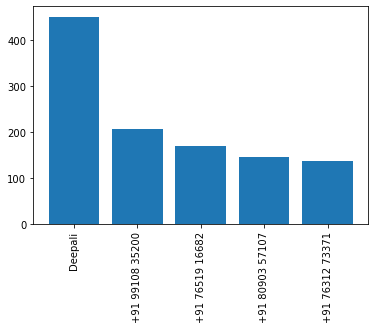

In [35]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

In [36]:
round((df['user'].value_counts()/df.shape[0])*100, 2).reset_index().rename(columns={'index': 'name', 'user': 'percent'})

,name,percent
0,Deepali,14.78
1,+91 99108 35200,6.78
2,+91 76519 16682,5.57
3,+91 80903 57107,4.75
4,+91 76312 73371,4.49
...,...,...
66,+91 6307 849 409,0.03
67,+91 95400 40667,0.03
68,+91 91191 47494,0.03
69,+91 72960 30529,0.03


In [37]:
import wordcloud

In [38]:
words = []

for message in df['message']:
    words.extend(message.split())

In [39]:
words

['Sidharth',
 'Tomar',
 'created',
 'group',
 '"Sec-5',
 '(CSE)',
 'unofficial',
 '🤩"',
 'You',
 'were',
 'added',
 '<Media',
 'omitted>',
 'This',
 'message',
 'was',
 'deleted',
 'Pendrive',
 'h',
 'kisi',
 'pr?',
 '8',
 'gb',
 'ya',
 'usse',
 'badi?',
 'Bata',
 'do',
 'abhi',
 'aajaunga',
 'lene',
 'Bhai',
 'mere',
 'p',
 'h',
 'Mere',
 'pas',
 'bhi',
 '🥺',
 '@918171433727',
 'Bisi',
 'bareilly',
 'aana',
 'pdega',
 'tujhe',
 'Bc',
 'Hai',
 'toh',
 'merpr',
 '<Media',
 'omitted>',
 'Please',
 'koi',
 'meri',
 'attendance',
 'lgwa',
 'dena',
 'aaj',
 'ki',
 'jisme',
 'bhi',
 'lg',
 'paaye',
 'Utkarsh',
 'Saxena',
 '20scse1010432',
 'Bhai',
 'mera',
 'bhi',
 'Neeraj',
 'kumar',
 '20scse1010413',
 '+1',
 'Anupma',
 'Kumari',
 '20scse1010422',
 'Same',
 ',Not',
 'in',
 'Town',
 'Kindly',
 'mark',
 'me',
 'present',
 'Pratyush',
 'Arvind',
 '20scse1010389',
 'Numerical',
 'methods',
 'mei',
 'koi',
 'present',
 'lgwa',
 'do',
 'please',
 'Tushant',
 'Kumar',
 'Singh',
 '20SCSE1010322',
 

In [44]:
from collections import Counter
Counter(words)

Counter({'Sidharth': 4,
         'Tomar': 4,
         'created': 1,
         'group': 19,
         '"Sec-5': 1,
         '(CSE)': 1,
         'unofficial': 1,
         '🤩"': 1,
         'You': 2,
         'were': 2,
         'added': 5,
         '<Media': 371,
         'omitted>': 371,
         'This': 54,
         'message': 54,
         'was': 53,
         'deleted': 52,
         'Pendrive': 1,
         'h': 238,
         'kisi': 35,
         'pr?': 1,
         '8': 9,
         'gb': 1,
         'ya': 36,
         'usse': 2,
         'badi?': 1,
         'Bata': 4,
         'do': 55,
         'abhi': 17,
         'aajaunga': 1,
         'lene': 1,
         'Bhai': 54,
         'mere': 2,
         'p': 4,
         'Mere': 6,
         'pas': 5,
         'bhi': 97,
         '🥺': 33,
         '@918171433727': 2,
         'Bisi': 1,
         'bareilly': 1,
         'aana': 11,
         'pdega': 8,
         'tujhe': 1,
         'Bc': 14,
         'Hai': 4,
         'toh': 44,
         'mer

In [45]:
Counter(words).most_common(20)

[('<Media', 371),
 ('omitted>', 371),
 ('h', 238),
 ('hai', 237),
 ('to', 184),
 ('ka', 173),
 ('ki', 133),
 ('nhi', 114),
 ('kya', 106),
 ('se', 103),
 ('bhi', 97),
 ('me', 95),
 ('ho', 86),
 ('ke', 77),
 ('bhai', 74),
 ('the', 74),
 ('hi', 72),
 ('Happy', 70),
 ('koi', 69),
 ('and', 57)]

In [46]:
# conver into dataframe

pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<Media,371
1,omitted>,371
2,h,238
3,hai,237
4,to,184
5,ka,173
6,ki,133
7,nhi,114
8,kya,106
9,se,103


1. remove messages regarding notifications

2. remove media omitted message

3. remove stop words

In [47]:
temp = df[df['user'] != 'group_notification']

In [48]:
temp

,date,user,message,year,month,day,hour,minute
2,2021-11-09 15:50:00,+91 73517 15995,<Media omitted>\n,2021,November,9,15,50
3,2021-11-09 19:18:00,+91 81714 33727,This message was deleted\n,2021,November,9,19,18
4,2021-11-10 16:36:00,+91 83183 66090,,2021,November,10,16,36
5,2021-11-10 23:00:00,+91 70172 96725,Pendrive h kisi pr?\n,2021,November,10,23,0
6,2021-11-10 23:00:00,+91 70172 96725,8 gb ya usse badi?\n,2021,November,10,23,0
...,...,...,...,...,...,...,...,...
3046,2022-06-10 20:34:00,+91 6299 676 680,"Hey *Galgotias University* students, looking t...",2022,June,10,20,34
3047,2022-06-11 16:18:00,+91 80760 95378,https://forms.gle/FaGCuTPMMJpEEXJW7\n,2022,June,11,16,18
3048,2022-06-19 22:09:00,+91 87002 80795,<Media omitted>\n,2022,June,19,22,9
3049,2022-06-22 18:53:00,+91 80760 95378,https://tinyurl.ru/c312548609/\n,2022,June,22,18,53


In [49]:
temp = temp[temp['message'] != '<Media omitted>\n']

In [50]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [51]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [54]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,kl,72
1,happy,71
2,class,55
3,hn,55
4,message,54
5,deleted,52
6,=,52
7,birthday,51
8,practical,50
9,},49


In [53]:
!pip install emoji

In [55]:
import emoji

In [57]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [62]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,421
1,🥲,136
2,🥺,109
3,🤣,81
4,🙂,68
...,...,...
120,💙,1
121,🥸,1
122,⭐,1
123,🌟,1


In [63]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

<BarContainer object of 5 artists>

C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129394 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129402 missing from current font.
 

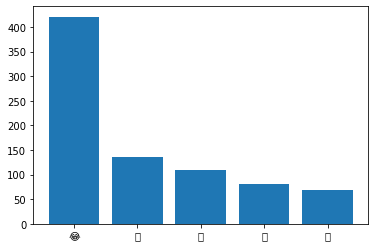

In [61]:
plt.bar(emoji_df[0].head(), emoji_df[1].head())

In [64]:
df['month_num'] = df['date'].dt.month

In [65]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2021-08-07 12:05:00,group_notification,"Sidharth Tomar created group ""Sec-5 (CSE) uno...",2021,August,7,12,5,8
1,2021-08-07 12:05:00,group_notification,You were added\n,2021,August,7,12,5,8
2,2021-11-09 15:50:00,+91 73517 15995,<Media omitted>\n,2021,November,9,15,50,11
3,2021-11-09 19:18:00,+91 81714 33727,This message was deleted\n,2021,November,9,19,18,11
4,2021-11-10 16:36:00,+91 83183 66090,,2021,November,10,16,36,11
...,...,...,...,...,...,...,...,...,...
3046,2022-06-10 20:34:00,+91 6299 676 680,"Hey *Galgotias University* students, looking t...",2022,June,10,20,34,6
3047,2022-06-11 16:18:00,+91 80760 95378,https://forms.gle/FaGCuTPMMJpEEXJW7\n,2022,June,11,16,18,6
3048,2022-06-19 22:09:00,+91 87002 80795,<Media omitted>\n,2022,June,19,22,9,6
3049,2022-06-22 18:53:00,+91 80760 95378,https://tinyurl.ru/c312548609/\n,2022,June,22,18,53,6


In [67]:
df.groupby(['year', 'month_num', 'month']).count()['message']

year  month_num  month   
2021  8          August         2
      11         November     937
      12         December    1825
2022  1          January      214
      2          February      26
      3          March          9
      4          April         17
      5          May           12
      6          June           9
Name: message, dtype: int64

In [69]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [70]:
timeline

,year,month_num,month,message
0,2021,8,August,2
1,2021,11,November,937
2,2021,12,December,1825
3,2022,1,January,214
4,2022,2,February,26
5,2022,3,March,9
6,2022,4,April,17
7,2022,5,May,12
8,2022,6,June,9


In [73]:
time=[]
for i in range(timeline.shape[0]):
    #print(i) # [0 - 8]
    #print(timeline['month'][i] + "-" + str(timeline['year'][i]))
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))
    

In [74]:
time

['August-2021',
 'November-2021',
 'December-2021',
 'January-2022',
 'February-2022',
 'March-2022',
 'April-2022',
 'May-2022',
 'June-2022']

In [75]:
timeline['time'] = time

In [76]:
timeline

,year,month_num,month,message,time
0,2021,8,August,2,August-2021
1,2021,11,November,937,November-2021
2,2021,12,December,1825,December-2021
3,2022,1,January,214,January-2022
4,2022,2,February,26,February-2022
5,2022,3,March,9,March-2022
6,2022,4,April,17,April-2022
7,2022,5,May,12,May-2022
8,2022,6,June,9,June-2022


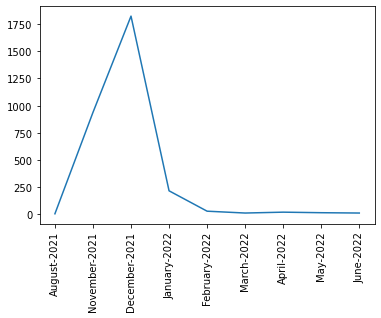

In [79]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation="vertical")
plt.show()

In [84]:
df['only_date'] = df['date'].dt.date

In [88]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

In [89]:
daily_timeline

,only_date,message
0,2021-08-07,2
1,2021-11-09,2
2,2021-11-10,6
3,2021-11-11,54
4,2021-11-12,29
...,...,...
95,2022-06-10,2
96,2022-06-11,1
97,2022-06-19,1
98,2022-06-22,1


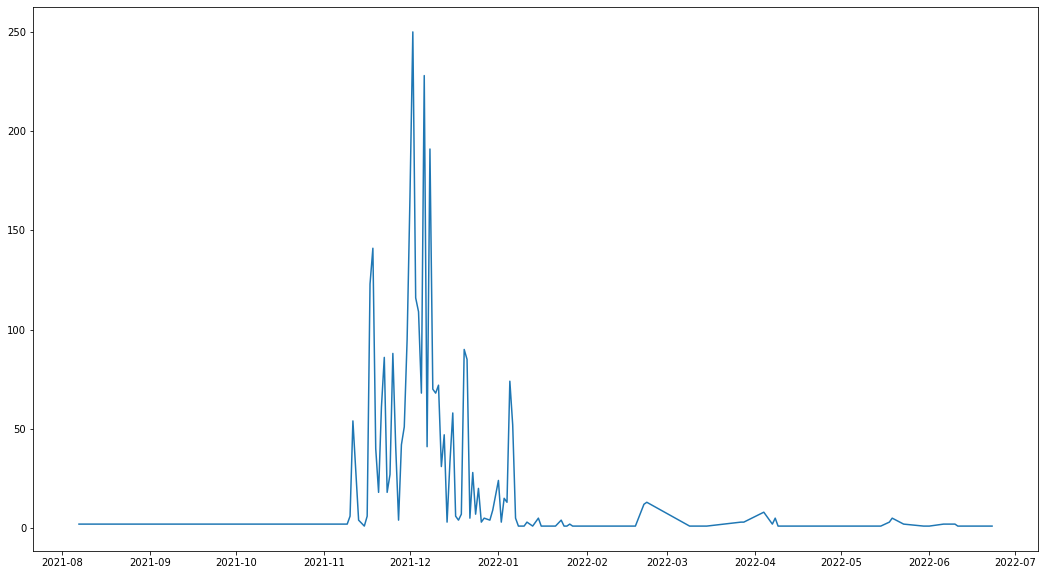

In [92]:
plt.figure(figsize=(18, 10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [93]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,onely_date,only_date
0,2021-08-07 12:05:00,group_notification,"Sidharth Tomar created group ""Sec-5 (CSE) uno...",2021,August,7,12,5,8,2021-08-07,2021-08-07
1,2021-08-07 12:05:00,group_notification,You were added\n,2021,August,7,12,5,8,2021-08-07,2021-08-07
2,2021-11-09 15:50:00,+91 73517 15995,<Media omitted>\n,2021,November,9,15,50,11,2021-11-09,2021-11-09
3,2021-11-09 19:18:00,+91 81714 33727,This message was deleted\n,2021,November,9,19,18,11,2021-11-09,2021-11-09
4,2021-11-10 16:36:00,+91 83183 66090,,2021,November,10,16,36,11,2021-11-10,2021-11-10


In [95]:
df['day_name'] = df['date'].dt.day_name()

In [96]:
df['day_name']

0        Saturday
1        Saturday
2         Tuesday
3         Tuesday
4       Wednesday
          ...    
3046       Friday
3047     Saturday
3048       Sunday
3049    Wednesday
3050     Thursday
Name: day_name, Length: 3051, dtype: object

In [97]:
df['day_name'].value_counts()

Thursday     761
Wednesday    642
Monday       554
Friday       321
Tuesday      282
Saturday     265
Sunday       226
Name: day_name, dtype: int64

In [98]:
df['month'].value_counts()

December    1825
November     937
January      214
February      26
April         17
May           12
June           9
March          9
August         2
Name: month, dtype: int64

In [99]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,onely_date,only_date,day_name
0,2021-08-07 12:05:00,group_notification,"Sidharth Tomar created group ""Sec-5 (CSE) uno...",2021,August,7,12,5,8,2021-08-07,2021-08-07,Saturday
1,2021-08-07 12:05:00,group_notification,You were added\n,2021,August,7,12,5,8,2021-08-07,2021-08-07,Saturday
2,2021-11-09 15:50:00,+91 73517 15995,<Media omitted>\n,2021,November,9,15,50,11,2021-11-09,2021-11-09,Tuesday
3,2021-11-09 19:18:00,+91 81714 33727,This message was deleted\n,2021,November,9,19,18,11,2021-11-09,2021-11-09,Tuesday
4,2021-11-10 16:36:00,+91 83183 66090,,2021,November,10,16,36,11,2021-11-10,2021-11-10,Wednesday


In [101]:
period=[]
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [102]:
df['period'] = period

In [104]:
df.head(5)

,date,user,message,year,month,day,hour,minute,month_num,onely_date,only_date,day_name,period
0,2021-08-07 12:05:00,group_notification,"Sidharth Tomar created group ""Sec-5 (CSE) uno...",2021,August,7,12,5,8,2021-08-07,2021-08-07,Saturday,12-13
1,2021-08-07 12:05:00,group_notification,You were added\n,2021,August,7,12,5,8,2021-08-07,2021-08-07,Saturday,12-13
2,2021-11-09 15:50:00,+91 73517 15995,<Media omitted>\n,2021,November,9,15,50,11,2021-11-09,2021-11-09,Tuesday,15-16
3,2021-11-09 19:18:00,+91 81714 33727,This message was deleted\n,2021,November,9,19,18,11,2021-11-09,2021-11-09,Tuesday,19-20
4,2021-11-10 16:36:00,+91 83183 66090,,2021,November,10,16,36,11,2021-11-10,2021-11-10,Wednesday,16-17


In [107]:
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,17.0,1.0,26.0,18.0,6.0,11.0,20.0,16.0,2.0,9.0,...,11.0,14.0,0.0,38.0,2.0,0.0,0.0,0.0,20.0,7.0
Monday,14.0,0.0,24.0,11.0,22.0,90.0,21.0,26.0,11.0,17.0,...,35.0,14.0,34.0,0.0,0.0,10.0,1.0,3.0,23.0,2.0
Saturday,21.0,1.0,3.0,3.0,8.0,34.0,7.0,5.0,51.0,11.0,...,36.0,15.0,8.0,0.0,1.0,1.0,4.0,2.0,8.0,1.0
Sunday,3.0,0.0,5.0,25.0,25.0,33.0,10.0,9.0,39.0,2.0,...,35.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
Thursday,18.0,2.0,24.0,50.0,39.0,83.0,72.0,30.0,32.0,34.0,...,60.0,6.0,2.0,0.0,0.0,1.0,0.0,11.0,17.0,29.0
Tuesday,7.0,2.0,21.0,6.0,36.0,6.0,21.0,14.0,1.0,2.0,...,18.0,8.0,67.0,0.0,0.0,0.0,0.0,7.0,25.0,12.0
Wednesday,7.0,8.0,4.0,6.0,63.0,43.0,28.0,13.0,21.0,8.0,...,145.0,15.0,31.0,5.0,1.0,0.0,5.0,7.0,7.0,9.0


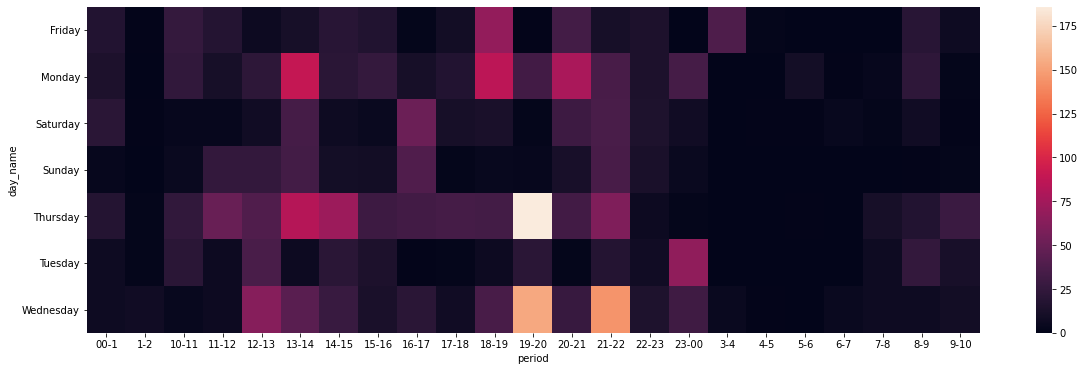

In [106]:
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()